<a href="https://colab.research.google.com/github/bradshimmin/Desktops/blob/main/AI_Skills_Tracker_Master_Charts_Generator_16jan25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Skills Tracker Master charts
Last update: 16jan25


In [ ]:
# Install libraries and import necessary modules.
import pandas as pd
import ast
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
print("all done")

all done


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Get secret keys
from google.colab import userdata

ANTHROPIC_API_KEY = userdata.get('Anthropic_key')
OPENAI_API_KEY = userdata.get('OpenAI_key')

print("all done")

Mounted at /content/gdrive
all done


In [ ]:
# Load DF
df = pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Datasets/ai_skills_tracker/ai_skills_2h24/ai_skills_full_4Q24_removed_duplicates.pkl')
print("all done")


all done


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237890 entries, 0 to 238299
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RecordID                  237890 non-null  int64  
 1   Job title                 237890 non-null  object 
 2   Full job description      237890 non-null  object 
 3   Date collected            193142 non-null  object 
 4   Date posted               237890 non-null  object 
 5   Week                      237890 non-null  int64  
 6   Year                      237890 non-null  int64  
 7   Month                     237890 non-null  int64  
 8   Quarter                   237890 non-null  object 
 9   Hiring entity             237890 non-null  object 
 10  Entity size               205691 non-null  object 
 11  Home office hybrid work   237890 non-null  object 
 12  Full or part time status  230282 non-null  object 
 13  Number of applicants      93282 non-null   float6

In [ ]:
# prompt: Print the first and last date in df using "Date posted"
df["Date posted"] = pd.to_datetime(df["Date posted"])

print(f"First date: {df['Date posted'].min()}")
print(f"Last date: {df['Date posted'].max()}")

First date: 2022-01-01 00:00:00
Last date: 2024-12-22 00:00:00


In [ ]:
# prompt: Using the "Date posted" datatime field, please create a dataframe of the number of posts by quarter for the top 50 countries (eg., "Territory")

# Group by 'Territory' and get the top 50 countries
top_50_countries = df['Territory'].value_counts().nlargest(50).index

# Filter the DataFrame for the top 50 countries
df_top_50 = df[df['Territory'].isin(top_50_countries)]

# Create a quarter column
df_top_50['Quarter'] = df_top_50['Date posted'].dt.to_period('Q')

# Group by territory and quarter, then count the number of posts
posts_by_quarter = df_top_50.groupby(['Territory', 'Quarter']).size().reset_index(name='Post Count')

posts_by_quarter

<ipython-input-6-64f33cd1b690>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_50['Quarter'] = df_top_50['Date posted'].dt.to_period('Q')


,Territory,Quarter,Post Count
0,Argentina,2022Q1,5
1,Argentina,2022Q2,8
2,Argentina,2022Q3,29
3,Argentina,2022Q4,29
4,Argentina,2023Q1,32
...,...,...,...
593,Vietnam,2023Q4,49
594,Vietnam,2024Q1,12
595,Vietnam,2024Q2,42
596,Vietnam,2024Q3,31


In [ ]:
# prompt: save posts_by_quarter as a csv file

posts_by_quarter.to_csv('posts_by_quarter_2H24.csv', index=False)

In [ ]:
# prompt: from posts_by_quarter, print the quarterly count for all Territory fields that equal "UK"

uk_posts = posts_by_quarter[posts_by_quarter['Territory'] == 'UK']
uk_posts

,Territory,Quarter,Post Count
562,UK,2022Q1,131
563,UK,2022Q2,693
564,UK,2022Q3,1046
565,UK,2022Q4,1180
566,UK,2023Q1,1313
567,UK,2023Q2,1362
568,UK,2023Q3,1147
569,UK,2023Q4,1094
570,UK,2024Q1,496
571,UK,2024Q2,662


In [ ]:
# prompt: Using posts_by_qarter, print the total number of posts for each quarter

import pandas as pd

posts_by_qarter = pd.read_csv('posts_by_quarter_2H24.csv') # Assuming the file is generated from the previous code

total_posts_by_quarter = posts_by_qarter.groupby('Quarter')['Post Count'].sum()
total_posts_by_quarter

,Post Count
Quarter,
2022Q1,3977
2022Q2,15244
2022Q3,26586
2022Q4,25509
2023Q1,24381
2023Q2,19149
2023Q3,25584
2023Q4,22773
2024Q1,21359


In [ ]:
# prompt: How many posts per quarter are there for China?

import pandas as pd

posts_by_qarter = pd.read_csv('posts_by_quarter_2H24.csv')

# Filter for China and sum the post counts
china_posts = posts_by_qarter[posts_by_qarter['Territory'] == 'China']
total_china_posts = china_posts['Post Count'].sum()

print(f"Total posts for China across all quarters: {total_china_posts}")

# Calculate posts per quarter for China
posts_per_quarter_china = china_posts.groupby('Quarter')['Post Count'].sum()
print("\nPosts per quarter for China:")
posts_per_quarter_china

Total posts for China across all quarters: 1354

Posts per quarter for China:


,Post Count
Quarter,
2022Q1,41
2022Q2,193
2022Q3,143
2022Q4,130
2023Q1,156
2023Q2,77
2023Q3,109
2023Q4,123
2024Q1,136


In [ ]:
# prompt: Create a quarter by quarter count of all df rows where "Full job description" contains one of two values, "PyTorch" or "Mindspore". Actually, I'd like a count for each separately, if you can.

# Create a function to count occurrences of a keyword in job descriptions by quarter
def count_keyword_by_quarter(df, keyword):
  df_keyword = df[df['Full job description'].str.contains(keyword, case=False, na=False)]
  keyword_counts = df_keyword.groupby('Quarter').size().reset_index(name=f'{keyword} Count')
  return keyword_counts

# Count occurrences of "PyTorch"
pytorch_counts = count_keyword_by_quarter(df_top_50, "PyTorch")

# Count occurrences of "Mindspore"
mindspore_counts = count_keyword_by_quarter(df_top_50, "Mindspore")

# Merge the results (optional, if you want them in a single DataFrame)
merged_counts = pd.merge(pytorch_counts, mindspore_counts, on='Quarter', how='outer')

# Display the results
print("PyTorch Counts by Quarter:")
print(pytorch_counts)
print("\nMindspore Counts by Quarter:")
print(mindspore_counts)

print("\nMerged Counts:")
merged_counts

PyTorch Counts by Quarter:
   Quarter  PyTorch Count
0   2022Q1            803
1   2022Q2           2675
2   2022Q3           2124
3   2022Q4           2307
4   2023Q1           2424
5   2023Q2           1879
6   2023Q3           3013
7   2023Q4           2395
8   2024Q1           2601
9   2024Q2           2727
10  2024Q3           2795
11  2024Q4           2302

Mindspore Counts by Quarter:
  Quarter  Mindspore Count
0  2022Q3                2
1  2023Q1                1
2  2023Q3                1
3  2024Q1                2
4  2024Q4                1

Merged Counts:


,Quarter,PyTorch Count,Mindspore Count
0,2022Q1,803,NaN
1,2022Q2,2675,NaN
2,2022Q3,2124,2.0
3,2022Q4,2307,NaN
4,2023Q1,2424,1.0
5,2023Q2,1879,NaN
6,2023Q3,3013,1.0
7,2023Q4,2395,NaN
8,2024Q1,2601,2.0
9,2024Q2,2727,NaN


In [ ]:
# create filter that's just 2H23 and 1Q24

# First convert 'Date posted' to datetime if not already
df['Date posted'] = pd.to_datetime(df['Date posted'])

# Create a mask for the first half of 2023
mask = (df['Date posted'] >= '2024-07-01') & (df['Date posted'] < '2024-12-22')

# Filter the dataframe using the mask and return it
df_full = df.copy()
df = df.loc[mask].copy()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32370 entries, 205517 to 238299
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RecordID                  32370 non-null  int64         
 1   Job title                 32370 non-null  object        
 2   Full job description      32370 non-null  object        
 3   Date collected            32370 non-null  object        
 4   Date posted               32370 non-null  datetime64[ns]
 5   Week                      32370 non-null  int64         
 6   Year                      32370 non-null  int64         
 7   Month                     32370 non-null  int64         
 8   Quarter                   32370 non-null  object        
 9   Hiring entity             32370 non-null  object        
 10  Entity size               11464 non-null  object        
 11  Home office hybrid work   32370 non-null  object        
 12  Full or part time

# Some ad hoc EDA

In [ ]:
# prompt: Using df["Entity size"] print the top company sizes

print(df["Entity size"].value_counts().nlargest(n=10) / len(df) * 100)

Entity size
10000+ Employees               16.765524
1001 to 5000 Employees          3.493976
5001 to 10000 Employees         3.076923
51 to 200 Employees             1.902997
1 to 50 Employees               1.835032
Unknown                         1.529194
201 to 500 Employees            1.408712
501 to 1000 Employees           1.285141
Mehr als 10.000 Mitarbeiter     0.685820
Más de 10 000 empleados         0.379981
Name: count, dtype: float64


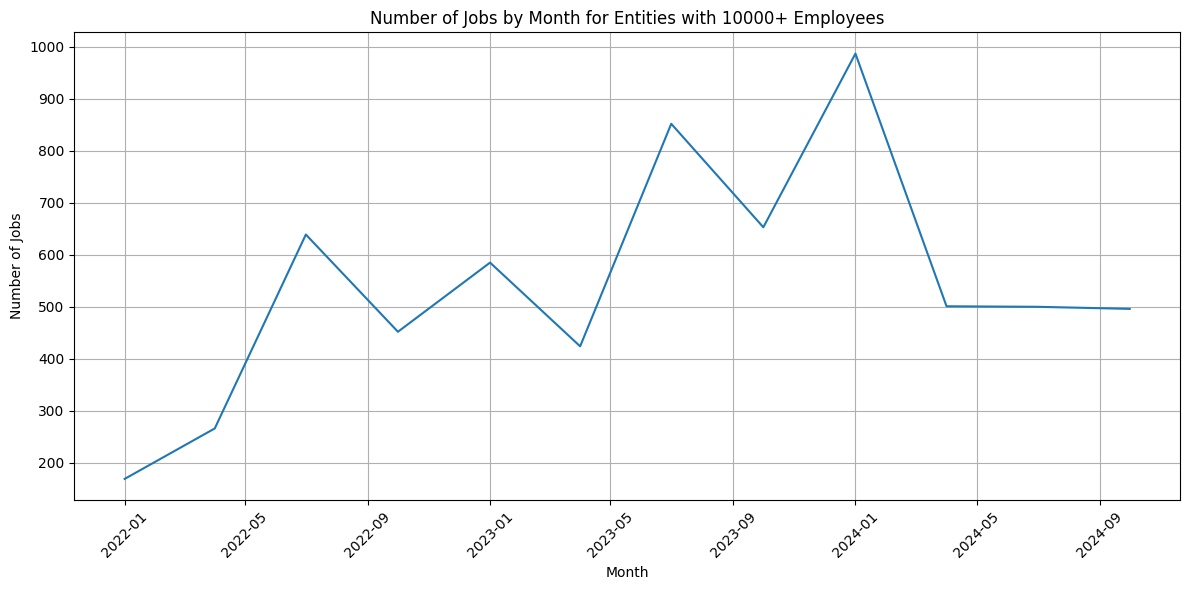

In [ ]:
# prompt: Using df_full["Entity size" create a line graph by month of row counts where Entity size = "10000+ Employees"

# Filter for "10000+ Employees"
df_large_entities = df_full[df_full["Entity size"] == "5001 to 10000 Employees"]

# Group by month and count rows
monthly_counts = df_large_entities.groupby(df_large_entities['Date posted'].dt.to_period('Q'))['Date posted'].count()

# Create the line graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index.to_timestamp(), monthly_counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs by Month for Entities with 10000+ Employees")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
monthly_counts

,Date posted
Date posted,
2022Q1,169
2022Q2,266
2022Q3,639
2022Q4,452
2023Q1,585
2023Q2,424
2023Q3,852
2023Q4,653
2024Q1,987


In [ ]:
df["Salary end"].mean()

129170.57333951189

In [ ]:
df["Salary start"].mean()

93747.06317578004

In [ ]:
top_job_titles = df["Job title"].value_counts().nlargest(10)
top_job_titles / len(df) * 100

,count
Job title,
Data Scientist,4.843991
Machine Learning Engineer,3.008959
Data Analyst,2.520853
Data Engineer,2.440531
Data Architect,1.884461
Business Analyst,1.649676
Senior Data Engineer,1.220266
Business Intelligence Analyst,1.158480
Business Intelligence Developer,1.004016


In [ ]:
top_hiring_entities = df['Hiring entity'].value_counts().nlargest(10)
top_hiring_entities / len(df) * 100

,count
Hiring entity,
TikTok,1.597158
Google,1.201730
Apple,1.149212
Microsoft,0.966945
Amazon,0.889713
Meta,0.815570
Amazon.com Services LLC,0.722892
Uber,0.685820
Amazon Web Services (AWS),0.658017


In [ ]:
# set top companies variable
# Create a list of companies to filter by
companies = ['Meta', 'Apple', 'Amazon', 'Uber', 'TikTok', 'Apple', 'Google', 'Microsoft']

In [ ]:
# prompt: Create a dataframe that counts the number of jobs posted by a given set of companies each month, including Meta, TikTok, Apple, Google, and Microsoft.

# Filter the dataframe for only these companies
df_filtered = df[df['Hiring entity'].isin(companies)]

# Group by 'Date posted' and resample by month, then count the number of posts for each company
monthly_posts_by_company = df_filtered.resample('M', on='Date posted')['Hiring entity'].value_counts().reset_index(name='Number_of_Posts')

# Print the table
print(monthly_posts_by_company)


   Date posted Hiring entity  Number_of_Posts
0   2024-07-31        Google              117
1   2024-07-31     Microsoft              101
2   2024-07-31        TikTok               90
3   2024-07-31         Apple               71
4   2024-07-31          Meta               59
5   2024-07-31          Uber               59
6   2024-07-31        Amazon               34
7   2024-08-31        Amazon               78
8   2024-08-31        Google               68
9   2024-08-31        TikTok               65
10  2024-08-31         Apple               60
11  2024-08-31     Microsoft               59
12  2024-08-31          Meta               42
13  2024-08-31          Uber               41
14  2024-09-30        Amazon               81
15  2024-09-30        TikTok               79
16  2024-09-30         Apple               69
17  2024-09-30        Google               58
18  2024-09-30     Microsoft               57
19  2024-09-30          Uber               55
20  2024-09-30          Meta      

<ipython-input-11-409c669c5d3b>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_posts_by_company = df_filtered.resample('M', on='Date posted')['Hiring entity'].value_counts().reset_index(name='Number_of_Posts')


In [ ]:
monthly_posts_by_company

,Date posted,Hiring entity,Number_of_Posts
0,2024-07-31,Google,117
1,2024-07-31,Microsoft,101
2,2024-07-31,TikTok,90
3,2024-07-31,Apple,71
4,2024-07-31,Meta,59
5,2024-07-31,Uber,59
6,2024-07-31,Amazon,34
7,2024-08-31,Amazon,78
8,2024-08-31,Google,68
9,2024-08-31,TikTok,65


In [ ]:
# Figure 1
# Show top companies for last six months

fig = px.line(monthly_posts_by_company, x='Date posted', y='Number_of_Posts', color='Hiring entity', markers=True, render_mode='svg')
fig.update_traces(line=dict(shape='spline', smoothing=1.3))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white',
                  yaxis_title="Number of posts",
                  width=800, height=600)  # Setting width and height
fig.show()

In [ ]:
# prompt: show the top 5 df["Job title"]  where the df["Hiring entity"] matches each of the companies stored in the "companies" str list variable.

def show_top_job_titles(df, companies):
  for company in companies:
    company_df = df[df['Hiring entity'] == company]
    top_jobs = company_df['Job title'].value_counts().nlargest(5)
    print(f"Top 5 job titles at {company}:")
    print(top_jobs)
    print("-" * 20)

show_top_job_titles(df, companies)

Top 5 job titles at Meta:
Job title
Data Scientist, Product Analytics                               9
Data Engineer, Product Analytics                                8
Software Engineer, Machine Learning                             5
Software Engineer, Realtime Engine Technology - Reality Labs    4
Software Engineer, Infrastructure                               4
Name: count, dtype: int64
--------------------
Top 5 job titles at Apple:
Job title
Machine Learning Engineer                                              10
AIML - Sr Machine Learning Engineer, Data and ML Innovation             8
AIML - Machine Learning Engineer, Siri and Information Intelligence     7
Data Scientist                                                          7
SoC Machine Learning Design Engineer                                    5
Name: count, dtype: int64
--------------------
Top 5 job titles at Amazon:
Job title
Business Analyst                                                9
Data Engineer                

In [ ]:
all_top_hiring_entities = df_full['Hiring entity'].value_counts().nlargest(20)
all_top_hiring_entities

,count
Hiring entity,
Amazon,4589
ClearanceJobs,3379
Apple,2961
Dice,2502
TikTok,2156
IBM,2074
Siemens,2062
Amazon Web Services (AWS),1991
Booz Allen Hamilton,1680


In [ ]:
all_companies = ['Meta', 'Apple', 'Amazon', 'Capgemini', 'Siemens', 'IBM', 'Google', 'Microsoft', 'Walmart', 'TikTok']

In [ ]:
# set up chart for full run

# prompt: Create a dataframe that counts the number of jobs posted by a given set of companies each month, including Meta, TikTok, Apple, Google, and Microsoft.

# Filter the dataframe for only these companies
df_full_filtered = df_full[df_full['Hiring entity'].isin(all_companies)]

# Group by 'Date posted' and resample by month, then count the number of posts for each company
all_monthly_posts_by_company = df_full_filtered.resample('ME', on='Date posted')['Hiring entity'].value_counts().reset_index(name='Number_of_Posts')

# Print the table
print(len(all_monthly_posts_by_company))


350


In [ ]:
all_monthly_posts_by_company

,Date posted,Hiring entity,Number_of_Posts
0,2022-01-31,Amazon,5
1,2022-01-31,Microsoft,4
2,2022-01-31,Apple,2
3,2022-01-31,Google,1
4,2022-01-31,Meta,1
...,...,...,...
345,2024-12-31,Amazon,33
346,2024-12-31,IBM,30
347,2024-12-31,Capgemini,19
348,2024-12-31,Walmart,12


In [ ]:
# Figure 2
# Show top companies for entire run of the skills tracker

fig = px.line(all_monthly_posts_by_company, x='Date posted', y='Number_of_Posts', color='Hiring entity', markers=True, render_mode='svg')
fig.update_traces(line=dict(shape='spline', smoothing=1.3))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white',
                  yaxis_title="Number of posts",
                  width=1000, height=600)  # Setting width and height
fig.show()

In [ ]:
# Function: Set up counter for select technologies

def count_technologies(df, column, tech_list):
    """
    Function to count the number of times each technology in tech_list
    is mentioned in the given column of the dataframe.
    """
    tech_counts = {tech: df[column].apply(lambda x: tech.lower() in x.lower()).sum() for tech in tech_list}
    return tech_counts




In [ ]:
# Figure 3: Job postings by technology, 2H24

tech_list = ['Predictive',
             'Natural language processing',
             'Computer Vision',
             'Generative AI',
             'AGI ']

tech_counts = count_technologies(df, 'Full job description', tech_list)

tech_counts_df = pd.DataFrame.from_records([tech_counts])

tech_counts_df / len(df) * 100

,Predictive,Natural language processing,Computer Vision,Generative AI,AGI
0,11.50139,8.11245,6.468953,9.308001,0.157553


In [ ]:
# Function: display changes for keywords over quarters

def keyword_quarterly(df, keyword):
    """take dataframe and keyword as arguments and print quarterly counts
    """
    # Filter the dataframe for records containing "keyword" in the "Full job description" column
    temp_df = df[df["Full job description"].str.contains(keyword, case = False, na=False)]

    # Group the filtered dataframe by quarter and count the number of posts
    posts_by_quarter = temp_df.groupby("Month").size()
    # percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size()) * 100
    percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Month").size() * 100).map("{:.2f}%".format)

    return(percentage_posts_by_quarter)


In [ ]:
# fig 5a
keyword_quarterly(df_full, "AGI ")


,0
Month,
1,0.03%
2,0.08%
3,0.04%
4,0.06%
5,0.06%
6,0.13%
7,0.04%
8,0.08%
9,0.08%


In [ ]:
# fig 5b
keyword_quarterly(df_full, "agentic")

,0
Month,
1,0.01%
2,nan%
3,0.01%
4,0.04%
5,0.06%
6,0.05%
7,0.04%
8,0.11%
9,0.09%


In [ ]:
# scrap
# prompt: Create a dataframe containing the percentage of monthly job posts from df that contain a mention of the following list of values within "Full job description". Please use "Date posted" to do your calculations. The list of companies includes: OpenAI, Anthropic, Cohere.

import pandas as pd
# List of companies to search for
companies = ['OpenAI', 'Anthropic', 'Meta', 'Google', 'Cohere']

# Create a new dataframe to store the results
company_mentions_df = pd.DataFrame()

# Iterate over the list of companies
for company in companies:
    # Calculate the percentage of monthly job posts that mention the company
    company_mentions_df[company] = df['Full job description'].str.contains(company, case=False).groupby(df['Date posted'].dt.to_period('M')).mean()

# Multiply by 100 to get percentages
company_mentions_df = company_mentions_df * 100

# Print the resulting dataframe
print(company_mentions_df)

               OpenAI  Anthropic      Meta     Google    Cohere
Date posted                                                    
2024-07      1.461378   0.748086  5.688935  12.056367  0.487126
2024-08      1.737528   0.500197  5.291562  10.056601  0.644991
2024-09      1.500633   0.433918  5.080456  11.155306  0.488158
2024-10      2.466938   0.610376  5.824008  13.504578  0.508647
2024-11      2.421722   1.002935  5.136986  13.136008  0.220157
2024-12      1.735477   0.493241  5.991962  11.508951  0.347095


In [ ]:
# Figure 5: Top job titles for all openings

# Get a list of the top employers
top_ents = df["Job title category"].value_counts() / len(df) * 100
top_ents = top_ents.rename_axis('unique_values').reset_index(name='counts')
top_ents = top_ents.head(25)
top_ents.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_ents, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
top_ents.head(25)

,unique_values,counts
0,Data and Analytics,3.907939
1,Data Scientist Deep Learning,3.768922
2,Machine Learning Engineer AI,3.694779
3,Data Scientist AI,3.107816
4,Data Analyst Machine Learning,2.990423
5,Data Scientist Machine Learning,2.931727
6,IT Engineer AI,2.783441
7,Business Analyst Data Science,2.607352
8,Data Engineer AI,2.520853
9,Data Architect AI,2.326228


In [ ]:
# Function: Comparing counts across quarters

def compare_counts(df, column, periods, numb):
    result_frames = []
    for period in periods:
        df_period = df[df['Quarter'].isin(period)]
        counts = df_period[column].value_counts()
        # Normalize the counts by dividing by the total counts for the period
        normalized_counts = counts / counts.sum()
        result_frames.append(normalized_counts)

    merged_counts = pd.concat(result_frames, axis=1, keys=[f'{period[0]}-{period[-1]}' for period in periods])
    merged_counts.fillna(0, inplace=True)

    merged_counts['Difference'] = merged_counts.iloc[:, 1] - merged_counts.iloc[:, 0]
    merged_counts['Percent change (%)'] = (merged_counts['Difference'] / merged_counts.iloc[:, 0]) * 100

    merged_counts = merged_counts.nlargest(numb, merged_counts.columns[0])

    return merged_counts



In [ ]:
# New figure 5: Job titles waxing and waning
# compare_counts(df, 'Job title category', [['3Q24', '4Q24'], ['1Q24']], 20)
compare_counts(df, 'Job title category', [['3Q24'], ['4Q24']], 20)

,3Q24-3Q24,4Q24-4Q24,Difference,Percent change (%)
Job title category,,,,
Data Scientist Deep Learning,0.046461,0.025419,-0.021042,-45.290369
Data Analyst Machine Learning,0.038567,0.017786,-0.020782,-53.884266
Data Scientist AI,0.033535,0.027642,-0.005893,-17.572072
Machine Learning Engineer AI,0.033535,0.041722,0.008188,24.415345
Business Analyst Data Science,0.032846,0.016600,-0.016246,-49.461123
Data Scientist Machine Learning,0.031257,0.026604,-0.004652,-14.883903
Data and Analytics,0.029932,0.051875,0.021943,73.308098
Data Engineer AI,0.026489,0.023418,-0.003071,-11.593064
Data Analyst Data Science,0.025747,0.016304,-0.009443,-36.677847


In [ ]:
# Figure 5 (extra): Top job title profiles
df['Job title category'].value_counts().nlargest(10)

,count
Job title category,
Data and Analytics,1265
Data Scientist Deep Learning,1220
Machine Learning Engineer AI,1196
Data Scientist AI,1006
Data Analyst Machine Learning,968
Data Scientist Machine Learning,949
IT Engineer AI,901
Business Analyst Data Science,844
Data Engineer AI,816


In [ ]:
# Figure 5 (extra): Top job title profiles
compare_counts(df, 'City', [['3Q24',], ['4Q24']], 20)



,3Q24-3Q24,4Q24-4Q24,Difference,Percent change (%)
City,,,,
New York,0.039131,0.031114,-0.008018,-20.489306
Remote,0.032103,0.033934,0.001831,5.703359
Seattle,0.031913,0.027202,-0.004711,-14.762919
San Francisco,0.025834,0.019924,-0.005911,-22.879139
Bengaluru,0.021782,0.057132,0.035351,162.294459
Atlanta,0.020959,0.014556,-0.006403,-30.548776
London,0.020199,0.022198,0.001999,9.897309
Washington,0.018046,0.011645,-0.006401,-35.471284
Chicago,0.016273,0.010826,-0.005447,-33.472416


In [ ]:
# prompt: Show the top 5 df["Job titles" for rows where "City" equals each of the following: ['Singapore', 'Bengaluru', 'San Jose']

cities = ['Singapore', 'Bengaluru', 'San Jose']
for city in cities:
  print(f"Top 5 Job Titles in {city}:")
  print(df[df["City"] == city]["Main industry"].value_counts().head(5))
  print("-" * 20)

Top 5 Job Titles in Singapore:
Main industry
Entertainment Providers     56
IT Services                 53
Technology                  41
Software Development        36
Human Resources Services    25
Name: count, dtype: int64
--------------------
Top 5 Job Titles in Bengaluru:
Main industry
IT Services             234
Software Development    192
Technology              105
Financial Services       50
Data Infrastructure      47
Name: count, dtype: int64
--------------------
Top 5 Job Titles in San Jose:
Main industry
Social Media               96
Entertainment Providers    77
Technology                 26
Software Development       22
IT Services                12
Name: count, dtype: int64
--------------------


In [ ]:
df['Hiring entity'].value_counts().nlargest(10)

,count
Hiring entity,
TikTok,517
Google,389
Apple,372
Microsoft,313
Amazon,288
Meta,264
Amazon.com Services LLC,234
Uber,222
Amazon Web Services (AWS),213


In [ ]:
# Figure 6: Hiring entities: Top companies

# Get a list of the top employers
top_ents = df["Hiring entity"].value_counts() / len(df) * 100
top_ents = top_ents.rename_axis('unique_values').reset_index(name='counts')
top_ents = top_ents.head(25)
top_ents.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_ents, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
top_ents

,unique_values,counts
0,TikTok,1.597158
1,Google,1.201730
2,Apple,1.149212
3,Microsoft,0.966945
4,Amazon,0.889713
5,Meta,0.815570
6,Amazon.com Services LLC,0.722892
7,Uber,0.685820
8,Amazon Web Services (AWS),0.658017
9,EPAM Systems,0.574606


In [ ]:
# Figure 7: Hiring entities by category

# compare_counts(df, 'Hiring entity', [['1Q23', '2Q23'], ['3Q23', '4Q23']])
hiring_entities = compare_counts(df, 'Hiring entity', [['3Q24'], ['4Q24']], 10)
hiring_entities = hiring_entities.reset_index()
hiring_entities.head(100)

,Hiring entity,3Q24-3Q24,4Q24-4Q24,Difference,Percent change (%)
0,Google,0.012873,0.010820,-0.002054,-15.954233
1,TikTok,0.012397,0.020972,0.008576,69.176424
2,Microsoft,0.011496,0.007114,-0.004382,-38.115660
3,Apple,0.010595,0.012746,0.002151,20.300578
4,Amazon,0.010225,0.007040,-0.003184,-31.144988
5,Amazon Web Services (AWS),0.008529,0.003854,-0.004676,-54.819948
6,Uber,0.008211,0.004965,-0.003246,-39.533843
7,Amazon.com Services LLC,0.007470,0.006892,-0.000578,-7.735826
8,ClearanceJobs,0.007364,0.000593,-0.006771,-91.949100
9,Meta,0.007205,0.009486,0.002281,31.655899


In [ ]:
# prompt: convert the datatype for 'AI skills' and 'AI technologies' to strings.

df['AI skills'] = df['AI skills'].astype(str)
df['AI technologies'] = df['AI technologies'].astype(str)


In [ ]:
df['AI skills'].iloc[2]

"['DATA ACCESS', 'COMMUNICATION SKILLS', 'DATA ENGINEERING', 'SCRIPTING LANGUAGE', 'CLOUD', 'BIG DATA TECHNOLOGIES', 'QUERY LANGUAGE', 'GATHERING REQUIREMENTS', 'ANALYSIS', 'DATA WAREHOUSE', 'PAYMENTS', 'DATA STRUCTURES', 'DESIGNING', 'DATA MODELING', 'SOFTWARE', 'SEGMENT', 'ENGINEERING', 'DESIGN', 'DYNAMIC DATA', 'EXPERIMENTATION', 'BUSINESS', 'SUPPORT', 'DATA SCIENCE', 'MARKETING', 'DATA INTEGRATION', 'SEGMENTATION', 'CLOUD ARCHITECTURE', 'BIG DATA', 'APACHE HIVE', 'SCRIPTING', 'EMR SYSTEMS', 'SSIS', 'SAP BUSINESSOBJECTS', 'PL/SQL']"

In [ ]:
df_skills = df.drop_duplicates(subset='AI skills')

In [ ]:
# prompt: explode 'AI skills' so that we have one row for each comma delimited entry in the 'AI skills" column

df_skills['AI skills'] = df['AI skills'].apply(lambda x: x.split(','))
df_skills = df_skills.explode('AI skills')


<ipython-input-27-fca4ec574c20>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_skills.shape

(507957, 30)

In [ ]:
# Figure 9: Top AI skills for 2H24

# Get value counts
skills_counts = df_skills['AI skills'].value_counts().nlargest(200)

# Convert to DataFrame
df_skills_counts = skills_counts.reset_index()

# Rename columns
df_skills_counts.columns = ['AI skills', 'counts']

# show dataframe
df_skills_counts

,AI skills,counts
0,'DEVELOPMENT',17190
1,'SUPPORT',15399
2,'DESIGN',15003
3,'MACHINE LEARNING',12050
4,'BUSINESS',9803
...,...,...
195,['FRAMEWORK',373
196,'ELT',372
197,'SDLC'],372
198,'MICROSOFT POWERPOINT',369


In [ ]:
# prompt: remove all "[" and single quotes from df_tech_counts and strip any leading or trailing spaces

# Assuming df_tech_counts is defined as in the provided code
df_skills_counts['AI skills'] = df_skills_counts['AI skills'].str.replace('[', '', regex=False)
df_skills_counts['AI skills'] = df_skills_counts['AI skills'].str.replace("'", '', regex=False)
df_skills_counts['AI skills'] = df_skills_counts['AI skills'].str.strip()

In [ ]:
df_skills_counts.head(25)

,AI skills,counts
0,DEVELOPMENT,17190
1,SUPPORT,15399
2,DESIGN,15003
3,MACHINE LEARNING,12050
4,BUSINESS,9803
5,CLOUD,9755
6,ANALYSIS,9211
7,ENGINEERING,8985
8,TRAINING,8830
9,DATA SCIENCE,7905


In [ ]:
# Figure 8: Top skills

# Get a list of the top employers
top_items = df_skills["AI skills"].value_counts() / len(df) * 100
top_items = top_items.rename_axis('unique_values').reset_index(name='counts')
top_items = top_items.head(25)
top_items.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_items, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
df_skills['AI skills'].value_counts().nlargest(10)


,count
AI skills,
'DEVELOPMENT',17190
'SUPPORT',15399
'DESIGN',15003
'MACHINE LEARNING',12050
'BUSINESS',9803
'CLOUD',9755
'ANALYSIS',9211
'ENGINEERING',8985
'TRAINING',8830


In [ ]:
df_skills.columns

Index(['RecordID', 'Job title', 'Full job description', 'Date collected',
       'Date posted', 'Week', 'Year', 'Month', 'Quarter', 'Hiring entity',
       'Entity size', 'Home office hybrid work', 'Full or part time status',
       'Number of applicants', 'Longitude', 'Latitude', 'City', 'Territory',
       'Region', 'Experience level', 'Education level', 'Salary start',
       'Salary end', 'Main industry', 'Job title category', 'AI technologies',
       'AI skills', 'Source name', 'Source URL', 'File Date'],
      dtype='object')

In [ ]:
# prompt: Within df_skills, what are the top five job titles where "AI Skills" contains the word "Development" (case insensitive)?

# Assuming df_skills is already defined as in the provided code.
top_job_titles = df_skills[
    df_skills['AI skills'].str.contains('business', case=False, na=False)
]['Hiring entity'].value_counts().nlargest(10)
top_job_titles

,count
Hiring entity,
Amazon,348
TikTok,329
Google,323
Amazon.com Services LLC,301
Microsoft,278
Walmart,212
Amazon Web Services (AWS),183
"Amazon Web Services, Inc.",174
IBM,154


In [ ]:
df_skills['AI skills'].iloc[2]

" 'DEVELOPMENT'"

In [ ]:
df_tech = df.drop_duplicates(subset='AI technologies')

In [ ]:
df_tech['AI technologies'].iloc[2]

"['KORNSHELL', 'SSIS', 'AMAZONAWS', 'PL', 'DATA PIPELINES', 'AWS MARKETING DATA WAREHOUSE - JARVIS', 'HIVE', 'ETL', 'ML', 'INFORMATICA', 'MDX', 'DATASTAGE', 'THE AWS MARKETING', 'PYTHON', 'HADOOP', 'AWS MARKETING', 'SCALA', 'HIVEQL', 'SPARKSQL', 'REDSHIFT', 'DATA ENGINEER', 'ODI', 'AWS SUPPORT', 'DDL', 'DATA SCIENCE AND ENGINEERING', 'SMGS', 'CORE', 'ELT', 'INTERFACE', 'AI', 'SPARK', 'AMAZON WEB SERVICES', 'GLOBAL SERVICES', 'SQL']"

In [ ]:
# prompt: explode 'AI skills' so that we have one row for each comma delimited entry in the 'AI skills" column

df_tech['AI technologies'] = df_tech['AI technologies'].apply(lambda x: x.split(','))
df_tech = df_tech.explode('AI technologies')


<ipython-input-90-4a9fe5bb16d9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Figure 9: Top AI tech
# Get value counts
tech_counts = df_tech['AI technologies'].value_counts().nlargest(200)

# Convert to DataFrame
df_tech_counts = skills_counts.reset_index()

# Rename columns
df_tech_counts.columns = ['AI technologies', 'counts']



In [ ]:
# prompt: remove all "[" and single quotes from df_tech_counts and strip any leading or trailing spaces

# Assuming df_tech_counts is defined as in the provided code
df_tech_counts['AI technologies'] = df_tech_counts['AI technologies'].str.replace('[', '', regex=False)
df_tech_counts['AI technologies'] = df_tech_counts['AI technologies'].str.replace("'", '', regex=False)
df_tech_counts['AI technologies'] = df_tech_counts['AI technologies'].str.strip()

In [ ]:
df_tech_counts.head(50)

,AI technologies,counts
0,DEVELOPMENT,17190
1,SUPPORT,15399
2,DESIGN,15003
3,MACHINE LEARNING,12050
4,BUSINESS,9803
5,CLOUD,9755
6,ANALYSIS,9211
7,ENGINEERING,8985
8,TRAINING,8830
9,DATA SCIENCE,7905


In [ ]:
# prompt: remove all "[" and single quotes from df_tech_counts and strip any leading or trailing spaces

# Assuming df_tech_counts is defined as in the provided code
df_tech['AI technologies'] = df_tech['AI technologies'].str.replace('[', '', regex=False)
df_tech['AI technologies'] = df_tech['AI technologies'].str.replace(']', '', regex=False)
df_tech['AI technologies'] = df_tech['AI technologies'].str.replace("'", '', regex=False)
df_tech['AI technologies'] = df_tech['AI technologies'].str.strip()

In [ ]:
# Figure 9: Top skills

# Get a list of the top employers
top_items = df_tech["AI technologies"].value_counts() / len(df) * 100
top_items = top_items.rename_axis('unique_values').reset_index(name='counts')
top_items = top_items.head(25)
top_items.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_items, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
# prompt: Within df_skills, what are the top five job titles where "AI Skills" contains the word "Development" (case insensitive)?

# Assuming df_skills is already defined as in the provided code.
top_ai_tech = df_tech[
    df_tech['AI technologies'].str.contains('PyTorch', case=False, na=False)
]['City'].value_counts().nlargest(10) / len(df_tech) * 100
top_ai_tech

,count
City,
New York,0.038376
San Francisco,0.032697
Seattle,0.030632
Remote,0.030632
Bengaluru,0.029083
San Jose,0.021683
Singapore,0.017381
London,0.016693
Atlanta,0.013939


In [ ]:
# Figure 11: Top programming languages
# Get value counts
tech_counts = df_tech['AI technologies'].value_counts().nlargest(50)

# Convert to DataFrame
df_tech_counts = tech_counts.reset_index()

# Rename columns
df_tech_counts.columns = ['AI technologies', 'counts']

# show dataframe
df_tech_counts


,AI technologies,counts
0,PYTHON,10484
1,AI,9357
2,COMPUTER SCIENCE,7614
3,ML,6739
4,COLLABORATION,5417
5,SQL,4496
6,PYTORCH,4404
7,DATA SCIENCE,4312
8,TENSORFLOW,4171
9,AWS,4020


In [ ]:
# prompt: remove all "[" and single quotes from df_tech_counts and strip any leading or trailing spaces

# Assuming df_tech_counts is defined as in the provided code
df_tech_counts['AI technologies'] = df_tech_counts['AI technologies'].str.replace('[', '', regex=False)
df_tech_counts['AI technologies'] = df_tech_counts['AI technologies'].str.replace("'", '', regex=False)
df_tech_counts['AI technologies'] = df_tech_counts['AI technologies'].str.strip()

In [ ]:
# Figure 10: Top skills

# Get a list of the top employers
top_items = df_tech["AI technologies"].value_counts() / len(df) * 100
top_items = top_items.rename_axis('unique_values').reset_index(name='counts')
top_items = top_items.head(25)
top_items.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_items, path=['unique_values'],values='counts', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
# Figure 12: Hiring priorities for ML frameworks

ml_frameworks = [
    # "ReAct",
    "MRKL",
    "BabyAGI",
    "AutoGen",
    "LangGraph",
    "CrewAI",
    # "LangChain",
    "Semantic Kernel",
    "MetaGPT",
    "Camel",
    "OpenAGI",
    "Flowise",
    "AgentGPT",
    "GoEX",
    "AutoGPT",
    "Promptflow",
    "LangFlow",
    # "Rasa",
    "Botpress",
    "AgentLite",
    "Voyager",
    "Internet of Agents",
    "AnyLogic",
    "llama_index",
    # "haystack",
    "griptape",
    "agent_protocol",
    "Swarm",
    "agentenv",
    "minigpt",
    "superagent",
    # "ix",
    "taskweaver",
    "ai_townhall",
    "automata",
    "chatdev",
    "autochat"
]

# Initialize an empty dictionary to store the percentages
percentages = {}

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Loop over the ML frameworks
for framework in ml_frameworks:
    # Use str.contains() with regex=True to check if the framework is in each row of 'Full job description'
    # Sum up the True values to get the count
    count = df['Full job description'].str.contains(framework, case=False, na=False, regex=True).sum()

    # Calculate the percentage and store it in the dictionary
    percentages[framework] = (count / total_rows) * 100

# Convert the dictionary to a DataFrame and remove regex characters from 'Language' column
df_percentages = pd.DataFrame(list(percentages.items()), columns=['ML Framework', 'Percentage'])
df_percentages['ML Framework'] = df_percentages['ML Framework'].str.replace(r'\\b', '')
df_percentages.head(30)

,ML Framework,Percentage
0,MRKL,0.000000
1,BabyAGI,0.006179
2,AutoGen,0.071053
3,LangGraph,0.108125
4,CrewAI,0.058696
5,Semantic Kernel,0.092678
6,MetaGPT,0.000000
7,Camel,0.058696
8,OpenAGI,0.000000
9,Flowise,0.006179


In [ ]:
# prompt: Create a dataframe that contains all records from df["Full job description"] that list one or more string items from ml_frameworks. Once complete, please save this as a csv.

# Create a new DataFrame to store the matching records
ml_frameworks_df = pd.DataFrame()

# Iterate through the ml_frameworks list
for framework in ml_frameworks:
  # Use boolean indexing to find rows where the framework is present in the job description
  framework_matches = df[df['Full job description'].str.contains(framework, case=False, na=False)]
  # Append the matching rows to the new DataFrame
  ml_frameworks_df = pd.concat([ml_frameworks_df, framework_matches])

# Remove duplicate rows based on 'Full job description'
ml_frameworks_df.drop_duplicates(subset='Full job description', inplace=True)

# Save the resulting DataFrame as a CSV file
ml_frameworks_df.to_csv('ml_frameworks_jobs.csv', index=False)

In [ ]:
ml_frameworks_df.head(50)


,RecordID,Job title,Full job description,Date collected,Date posted,Week,Year,Month,Quarter,Hiring entity,...,Education level,Salary start,Salary end,Main industry,Job title category,AI technologies,AI skills,Source name,Source URL,File Date
223735,223735,"Senior Deep Learning Scientist, LLM and Tools",Widely considered to be one of the technology ...,2024-09-23 00:00:00,2024-09-18,38,2024,9,3Q24,NVIDIA,...,Doctoral degree,148000.0,276000.0,NaN,MLOps Engineer AI,"['MEGATRON MODELS', 'ARTIFICIAL INTELLIGENCE A...","['INTERACTION', 'CLOUD', 'NATURAL LANGUAGE', '...",Glassdoor,https://www.glassdoor.com/partner/jobListing.h...,2024-07-01 00:00:00
206546,206546,Senior Applied AI Engineer,"About Maisa\nAt Maisa, we lead AI innovation b...",2024-08-01 00:00:00,2024-07-28,30,2024,7,3Q24,Maisa,...,NaN,99461.0,147102.0,NaN,IT Engineer AI,"['ENGINEERING AND RESEARCH', 'LLAMAINDEX', 'RA...","['BUSINESS', 'AI', 'COMMUNICATION SKILLS', 'CO...",Glassdoor,https://www.glassdoor.com/partner/jobListing.h...,2024-07-01 00:00:00
206686,206686,Staff Software Development Engineer,About SAI Group\nSAI Group is a private invest...,2024-08-26 00:00:00,2024-08-19,34,2024,8,3Q24,JazzX AI,...,NaN,97147.0,145618.0,NaN,MLOps Engineer Artificial Intelligence,"['""SAI GROUPS""', 'TENSORFLOW', 'LLAMAINDEX', '...","['ORCHESTRATION', 'AI', 'DEPLOYMENT', 'LANGUAG...",Glassdoor,https://www.glassdoor.com/partner/jobListing.h...,2024-07-01 00:00:00
216299,216299,"Machine Learning Engineer, Generative AI","Machine Learning Engineer, Generative AIBosnia...",2024-09-19 00:00:00,2024-08-29,35,2024,8,3Q24,HTEC,...,NaN,89296.0,119996.0,IT Services,Machine Learning Engineer AI,"['ML', 'SEMANTIC KERNEL', 'TENSORFLOW', 'MACHI...","['DEPLOYMENT', 'VISUALIZATION', 'HELM', 'MODEL...",LinkedIn,https://rs.linkedin.com/jobs/view/machine-lear...,2024-07-01 00:00:00
216513,216513,"Principal Researcher - Deep Learning, Reinforc...",Microsoft Research (MSR) AI Frontiers lab is s...,2024-09-09 00:00:00,2024-09-05,36,2024,9,3Q24,Microsoft,...,Doctoral degree,137600.0,294000.0,NaN,Data Scientist Deep Learning,"['COLT', 'LAM', 'ARTFICIAL INTELLIGENCE', 'CON...","['ORCHESTRATION', 'REINFORCEMENT LEARNING', 'A...",Glassdoor,https://www.glassdoor.com/partner/jobListing.h...,2024-07-01 00:00:00
216514,216514,Senior Principal Researcher - Deep Learning & ...,Microsoft Research (MSR) AI Frontiers lab is s...,2024-09-23 00:00:00,2024-09-20,38,2024,9,3Q24,Microsoft,...,Doctoral degree,161600.0,314400.0,NaN,Data Scientist Deep Learning,"['RESEARCH SCIENCES IC6COLLABORATION', 'COLT',...","['ORCHESTRATION', 'REINFORCEMENT LEARNING', 'A...",Glassdoor,https://www.glassdoor.com/partner/jobListing.h...,2024-07-01 00:00:00
218965,218965,Senior AI Engineer,"Remote - Must be living in Arizona, California...",2024-09-19 00:00:00,2024-09-16,38,2024,9,3Q24,Harnham,...,NaN,200000.0,230000.0,Staffing,Machine Learning Scientist Artificial Intellig...,"['KEYWORDSMACHINE LEARNING | PYTORCHPYTORCH', ...","['BUSINESS', 'SUPPORT', 'NATURAL LANGUAGE PROC...",LinkedIn,https://www.linkedin.com/jobs/view/senior-ai-e...,2024-07-01 00:00:00
220043,220043,Principal Data Engineer,Security represents the most critical prioriti...,2024-08-01 00:00:00,2024-07-30,31,2024,7,3Q24,Microsoft,...,Master's degree,137600.0,294000.0,NaN,Business Intelligence Developer Machine Learning,"['LANGGRAPH', 'AZURE AML', 'MSECADAPTAZURE', '...","['COMMUNICATION SKILLS', 'DATA ENGINEERING', '...",Glassdoor,https://www.glassdoor.com/partner/jobListing.h...,2024-07-01 00:00:00
221032,221032,Middle AI Developer,Teralco Group nace en 2002 y se convierte en C...,2024-09-19 00:00:00,2024-08-25,34,2024,8,3Q24,Teralco,...,NaN,91394.0,103971.0,IT Services,Business Intelligence Developer AI,"['FLEXIBILIDAD PARA ELLO', 'LAS EMPRESAS', 'LA...",[],LinkedIn,https://es.linkedin.com/jobs/view/middle-ai-de...,2024-07-01 00:00:00
224323,224323,python开发工程师（AI）,职位来源于智联招聘。岗位职责：1、负责独立完成技术方案撰写包含基于业务逻辑和产品原型完成代码...,2024-07-19 00:00:00,2024-07-18,29,2024,7,3Q24,北京外企德科人力资源

In [ ]:
# Figure 10: Top skills

# Get a list of the top agent frameworks
# top_items = df_percentages["ML Framework"].value_counts() / len(df) * 100
top_items = df_percentages.rename_axis('ML Frameworks').reset_index()
top_items = top_items.head(30)
top_items.columns

colors = ["#49ACF8", "#3472E4", "#731AED", "#6D2CA7", "#A54EAC", "#EB4EAC"]

fig = px.treemap(top_items, path=['ML Framework'],values='Percentage', width=1600, height=800)
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=25, l=25, r=25, b=25),
    title="",
    font=dict(
        family="Courier New, monospace Bold",
        size=24,
        color="RebeccaPurple"
    )
)
fig.show()

In [ ]:
# Function to display changes for keywords over quarters
def keyword_quarterly(df_full, keyword):
    """take dataframe and keyword as arguments and print quarterly counts
    """
    # Filter the dataframe for records containing "keyword" in the "Full job description" column
    temp_df = df_full[df_full["Full job description"].str.contains(keyword, case = False, na=False)]

    # Group the filtered dataframe by quarter and count the number of posts
    posts_by_quarter = temp_df.groupby("Quarter").size()
    # percentage_posts_by_quarter = (posts_by_quarter / df.groupby("Quarter").size()) * 100
    percentage_posts_by_quarter = (posts_by_quarter / df_full.groupby("Quarter").size() * 100).map("{:.2f}%".format)


    return(percentage_posts_by_quarter)


In [ ]:
keyword_quarterly(df_full, "LangGraph")


,0
Quarter,
1Q22,nan%
1Q23,nan%
1Q24,nan%
2Q22,nan%
2Q23,nan%
2Q24,0.01%
3Q22,0.00%
3Q23,nan%
3Q24,0.05%


In [ ]:
# Fig 10
# prompt: Create a dataframe that contains the counts for job postings by month (using the datetime column, "Date posted") where "Full job description" contains one or more keywords including "LangGraph" and LangFlow"

# Create a boolean mask for rows where "Full job description" contains both keywords
keywords = ["LangGraph", "LangFlow", "LangChain"]
mask = df_full["Full job description"].str.contains("|".join(keywords), case=False, na=False)

# Apply the mask to filter the DataFrame
filtered_df = df_full[mask]

# Group by month and count job postings
monthly_counts = filtered_df.groupby(filtered_df["Date posted"].dt.to_period("M")).size().reset_index(name="counts")

# Display the resulting DataFrame
monthly_counts

,Date posted,counts
0,2022-08,1
1,2023-03,5
2,2023-04,6
3,2023-05,15
4,2023-06,11
5,2023-07,35
6,2023-08,60
7,2023-09,66
8,2023-10,105
9,2023-11,97


In [ ]:
# Figure 15: Top Generative AI Models

models = [
    'GPT-4o', 'GPT-4', 'Claude', 'Cohere',
    'o1-mini', 'o1', 'Llama', 'Falcon', 'Granite', 'Aya ', 'Nemotron',
    'Titan', 'Mistral', 'Qwen', 'Phi ', 'Llava', 'Gemini',
    'DeepSeek', 'Flux', 'Grok', "Reka ", 'Gemma', 'Nova ', 'Jamba',
    'Hermes', 'Falcon'
    ]

# Initialize an empty dictionary to store the percentages
percentages = {}

# Get the total number of rows in the DataFrame
total_rows = len(df)

# Loop over the ML frameworks
for model in models:
    # Use str.contains() with regex=True to check if the framework is in each row of 'Full job description'
    # Sum up the True values to get the count
    count = df['Full job description'].str.contains(model, case=False, na=False, regex=True).sum()

    # Calculate the percentage and store it in the dictionary
    percentages[model] = (count / total_rows) * 100

# Convert the dictionary to a DataFrame and remove regex characters from 'Language' column
df_percentages = pd.DataFrame(list(percentages.items()), columns=['Model', 'Percentage'])
df_percentages['Model'] = df_percentages['Model'].str.replace(r'\\b', '')



In [ ]:
# Figure 15: Top Generative AI Models (comparing proprietary and open source)
df_percentages.head(50)

,Model,Percentage
0,GPT-4o,0.043250
1,GPT-4,0.401606
2,Claude,0.485017
3,Cohere,0.469571
4,o1-mini,0.000000
5,o1,0.234785
6,Llama,1.621872
7,Falcon,0.064875
8,Granite,0.012357
9,Aya,0.148285
